## Data Visualization 
### CA2 Assignment 

##### Name: Choo Weng Yan 
##### Class: DIT/FT/1B/14
##### Admission Number: p1940208 

### Dataset 1 (Price Range of HDB Flats Offered)

In [15]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#import dataset 
data=pd.read_csv("price-range-of-hdb-flats-offered.csv",na_values=['na'])

#data cleansing (removing null values)
data1=data.dropna()

#melt min and max selling price into one column and rename it as Type of Price
data2= pd.melt(data1, id_vars=["room_type"],var_name="Type_of_Price",value_name="Selling_Price",value_vars=['min_selling_price','max_selling_price'])


msg="Information about the Dataset After Data Cleansing (removing null values)"
print("*"*len(msg))
print (msg)
print("*"*len(msg))
print(data1.info())

#show the first 5 rows of data
print(data1.head())
print()

msg1="Information about the dataset After Data Cleansing (Melting Columns)"
print("*"*len(msg1))
print (msg1)
print("*"*len(msg1))
print(data2.info())

#show the first 5 rows of data
print(data2.head())


*************************************************************************
Information about the Dataset After Data Cleansing (removing null values)
*************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 167
Data columns (total 5 columns):
financial_year       165 non-null int64
town                 165 non-null object
room_type            165 non-null object
min_selling_price    165 non-null float64
max_selling_price    165 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.7+ KB
None
   financial_year         town room_type  min_selling_price  max_selling_price
0            2008      Punggol    2-room            82000.0           107000.0
1            2008      Punggol    3-room           135000.0           211000.0
2            2008      Punggol    4-room           223000.0           327000.0
3            2008      Punggol    5-room           305000.0           428000.0
4     

Text(0, 0.5, 'Type of Rooms')

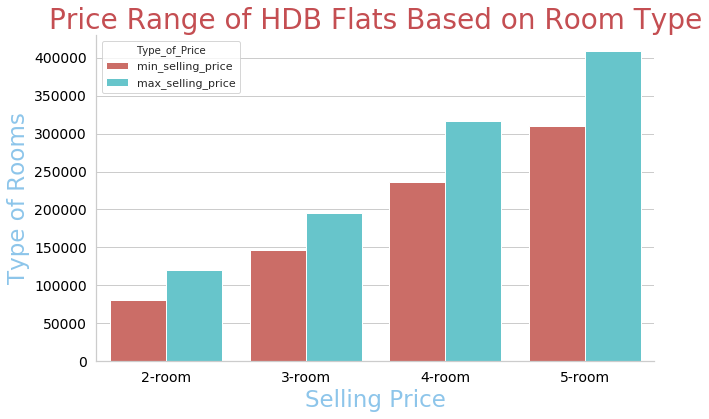

In [16]:
#adjust the size of the graph
plt.figure(figsize=(10,6))

#set the style of the graph 
sns.set(style="whitegrid")

#plotting barchart
sns.barplot(x="room_type", y="Selling_Price", hue="Type_of_Price", data=data2, ci=None, palette=sns.color_palette("hls",2))

#remove top and right border of the graph
sns.despine(fig=None, top=True, right=True)

#adjust the size
plt.tick_params(labelsize=14,labelcolor="black")

#showing the labels and customizing the colors 
plt.title("Price Range of HDB Flats Based on Room Type",size=28,color="r")
plt.xlabel("Selling Price",size=23,alpha=0.7,color='#5DADE2')
plt.ylabel("Type of Rooms",size=23,alpha=0.7,color='#5DADE2')


In [17]:
#extract columns and certain towns and sum up the selling price by putting them into a list

#punggol 
a=data1[['town','min_selling_price','max_selling_price']]
df=a[data1['town']=="Punggol"]
punggol_min=df[df.columns[1]].tolist()
punggol_max=df[df.columns[2]].tolist()
punggol_list=punggol_min + punggol_max

#Jurong West
b=data1[['town','min_selling_price','max_selling_price']]
df1=b[data1['town']=="Jurong West"]
JW_min=df1[df1.columns[1]].tolist()
JW_max=df1[df1.columns[2]].tolist()
JW_list=JW_min + JW_max

#bukit panjang
c=data1[['town','min_selling_price','max_selling_price']]
df2=c[data1['town']=="Bukit Panjang"]
bp_min=df2[df2.columns[1]].tolist()
bp_max=df2[df2.columns[2]].tolist()
bp_list=bp_min + bp_max

#Bukit Batok
d=data1[['town','min_selling_price','max_selling_price']]
df3=d[data1['town']=="Bukit Batok"]
bb_min=df3[df3.columns[1]].tolist()
bb_max=df3[df3.columns[2]].tolist()
bb_list=bb_min + bb_max

#Choa Chu Kang
e=data1[['town','min_selling_price','max_selling_price']]
df4=e[data1['town']=="Choa Chu Kang"]
cck_min=df4[df4.columns[1]].tolist()
cck_max=df4[df4.columns[2]].tolist()
cck_list=cck_min + cck_max

#Sengkang
f=data1[['town','min_selling_price','max_selling_price']]
df5=f[data1['town']=="Sengkang"]
sk_min=df5[df5.columns[1]].tolist()
sk_max=df5[df5.columns[2]].tolist()
sk_list=sk_min + sk_max

#Sembawang
g=data1[['town','min_selling_price','max_selling_price']]
df6=f[data1['town']=="Sembawang"]
sbw_min=df6[df6.columns[1]].tolist()
sbw_max=df6[df6.columns[2]].tolist()
sbw_list=sbw_min + sbw_max

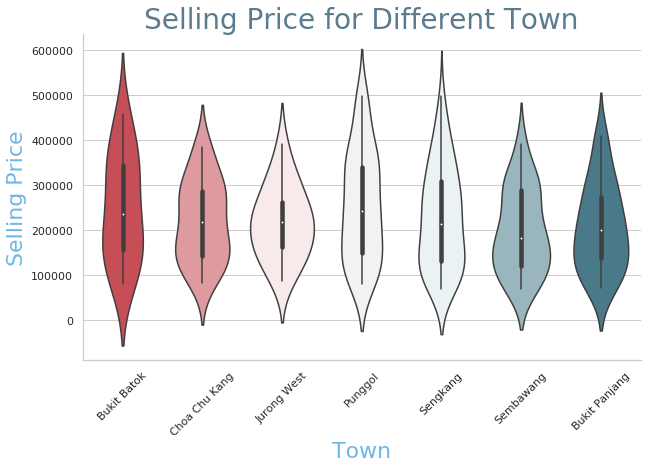

In [18]:
#create a new dataframe and add the extracted values and lists into the dataframe
violin = pd.DataFrame({'Town': ['Bukit Batok'] * len(bb_list) + ['Choa Chu Kang'] * len(cck_list) + ['Jurong West'] * len(JW_list) + ['Punggol'] * len(punggol_list)+ ['Sengkang'] * len(sk_list) + ['Sembawang'] * len(sbw_list) + ['Bukit Panjang'] * len(bp_list) ,
                     'Selling Price': bb_list + cck_list + JW_list + punggol_list + sk_list + sbw_list + bp_list})

#styling for the graph
sns.set(style="ticks")
sns.set(style="whitegrid")

#adjust the size of graph
plt.figure(figsize=(10,6))

#set the labels
plt.title("Selling Price for Different Town",size=28,alpha=0.7,color='#154360')
plt.xlabel("Town",size=22,alpha=0.7,color='#3498DB')
plt.xticks(rotation=45)
plt.ylabel("Selling Price ($)",size=22,alpha=0.7,color='#3498DB')

sns.despine(fig=None, top=True, right=True, left=False)

#plotting violin plot
sns.violinplot(x='Town',y='Selling Price',data=violin,palette=sns.diverging_palette(10, 220, sep=80, n=7))

### Dataset 2 (Median Rent by Town and Flat Type) 

In [1]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#import data 
data=pd.read_csv("median-rent-by-town-and-flat-type.csv",na_values=["na","-"])

#remove null values
data1=data.dropna()

msg2="Information of the dataset Before Data Cleansing"
print("*"*len(msg2))
print (msg2)
print("*"*len(msg2))
print(data.info())
print(data.head())
print()

msg3="Information of the dataset After Data Cleansing (Dropping NaN Values)"
print("*"*len(msg3))
print (msg3)
print("*"*len(msg3))
print(data1.info())
print(data1.head())


************************************************
Information of the dataset Before Data Cleansing
************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 4 columns):
quarter        8001 non-null object
town           8001 non-null object
flat_type      8001 non-null object
median_rent    3598 non-null float64
dtypes: float64(1), object(3)
memory usage: 250.1+ KB
None
   quarter        town flat_type  median_rent
0  2005-Q2  ANG MO KIO      1-RM          NaN
1  2005-Q2  ANG MO KIO      2-RM          NaN
2  2005-Q2  ANG MO KIO      3-RM        800.0
3  2005-Q2  ANG MO KIO      4-RM        950.0
4  2005-Q2  ANG MO KIO      5-RM          NaN

*********************************************************************
Information of the dataset After Data Cleansing (Dropping NaN Values)
*********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3598 e

Text(0, 0.5, 'Median Rent')

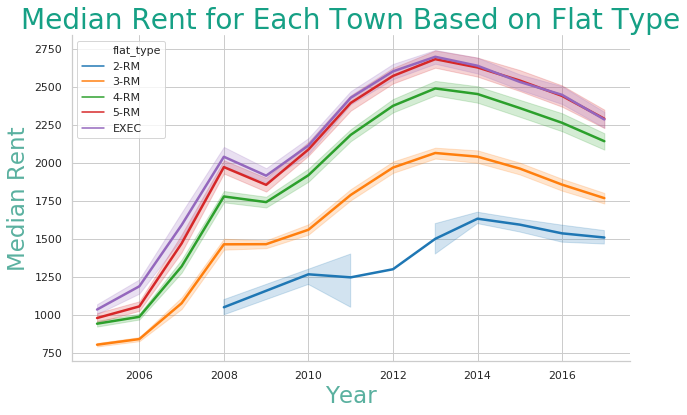

In [20]:
## show the format of quarter 
d=data1['quarter']

## convert quarter into year
d= pd.PeriodIndex(d, freq='Q').to_timestamp()
d1=d.year 

#adjust the size of figure
plt.figure(figsize=(10,6))

#create lineplot
sns.lineplot(data=data1, x=d1,y="median_rent",hue="flat_type",hue_order=["2-RM","3-RM","4-RM","5-RM","EXEC"],palette="tab10", linewidth=2.5)
sns.set_style("whitegrid") 
sns.despine(fig=None, top=True, right=True)

#lables for the graph
plt.title("Median Rent for Each Town Based on Flat Type",size=28,color="#16A085")
plt.xlabel("Year",size=23,alpha=0.7,color='#148F77')
plt.ylabel("Median Rent",size=23,alpha=0.7,color='#148F77')



In [30]:
#extract columns 
z=data1['town']
u=data1['flat_type']
i=data1['median_rent']

#create new dataframe
df=pd.DataFrame({'Year':d1,'town':z,'flat_type':u,'median_rent':i})

#extract only rows with 4 rooms
dataR=df[df.flat_type=="4-RM"]

#extract area from west region
dataBB=dataR[dataR.town=="BUKIT BATOK"]
dataCCK=dataR[dataR.town=="CHOA CHU KANG"]
dataJW=dataR[dataR.town=="JURONG WEST"]

#concat the extracted data 
west=pd.concat([dataBB,dataCCK,dataJW])

#extract only year from 2012 onwards
west1=df.loc[:,'Year']>=2012

#extract the columns that are wanted
West=west[west1][['Year','town','flat_type','median_rent']]
West.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Year,town,flat_type,median_rent
4286,2012,BUKIT BATOK,4-RM,2170.0
4442,2012,BUKIT BATOK,4-RM,2230.0
4598,2012,BUKIT BATOK,4-RM,2300.0
4754,2012,BUKIT BATOK,4-RM,2330.0
4910,2013,BUKIT BATOK,4-RM,2400.0


Text(0.5, 0.98, 'Price Rent for HDB Flats in West Area')

<Figure size 1152x1152 with 0 Axes>

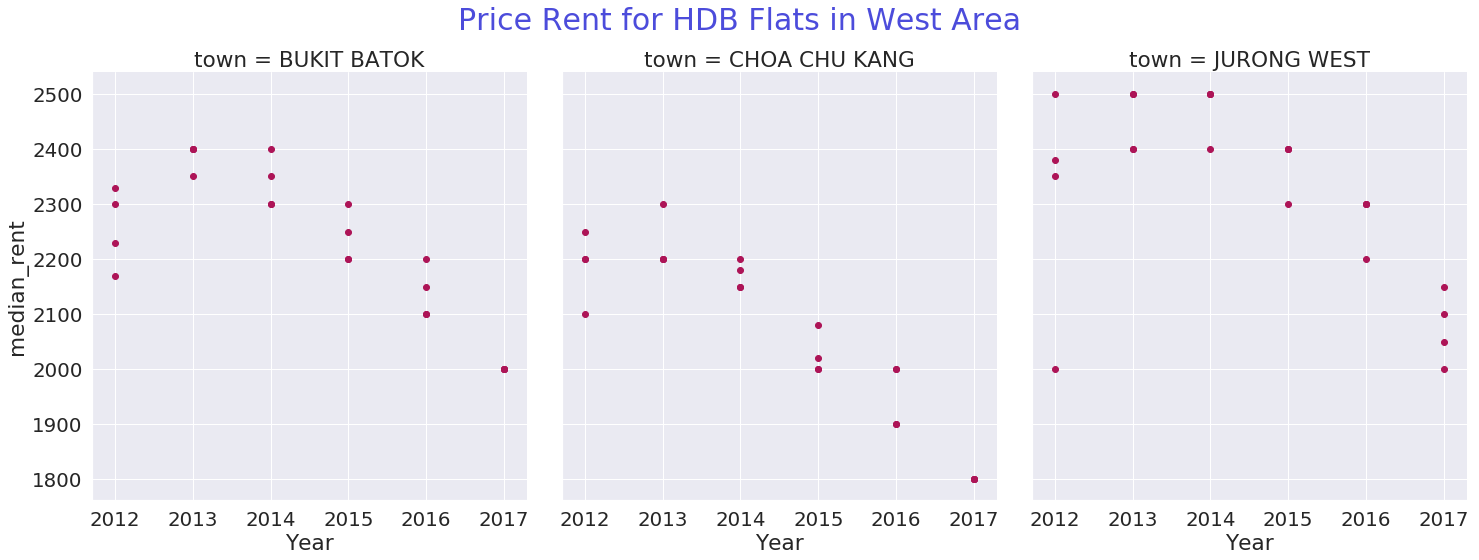

In [29]:
sns.set(font_scale=1.8) 

plt.figure(figsize=(16,16))

#facetgrid
g=sns.FacetGrid(West,col='town',height=7)
g
#map using scatter plot
g.map(plt.scatter,'Year','median_rent',color='#AD1457',marker='o')
#set the x labels 
g.set(xticks=[2012,2013,2014,2015,2016,2017])

plt.subplots_adjust(top=0.85, bottom=0)

#title of the graph
g.fig.suptitle('Price Rent for HDB Flats in West Area',size=30,alpha=0.7,color='#0000CC' )


### Dataset 3 (Resale Flat Prices Based on Approval Date 1990 Onwards)

In [31]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#import data 
resale1=pd.read_csv("resale-flat-prices-based-on-approval-date-1990-onwards.csv")

msg4="Information of the dataset Before Data Cleansing"
print("*"*len(msg4))
print (msg4)
print("*"*len(msg4))
print(resale1.info())
print(resale1.head())
print()

resale=resale1[['month','town','flat_type','floor_area_sqm','resale_price']]
msg5="Information of the dataset After Data Cleansing (Extract the columns that are needed)"
print("*"*len(msg5))
print (msg5)
print("*"*len(msg5))
print(resale.info())
print(resale.head())


************************************************
Information of the dataset Before Data Cleansing
************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769807 entries, 0 to 769806
Data columns (total 10 columns):
month                  769807 non-null object
town                   769807 non-null object
flat_type              769807 non-null object
block                  769807 non-null object
street_name            769807 non-null object
storey_range           769807 non-null object
floor_area_sqm         769807 non-null float64
flat_model             769807 non-null object
lease_commence_date    769807 non-null int64
resale_price           769807 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 58.7+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 

<Figure size 720x432 with 0 Axes>

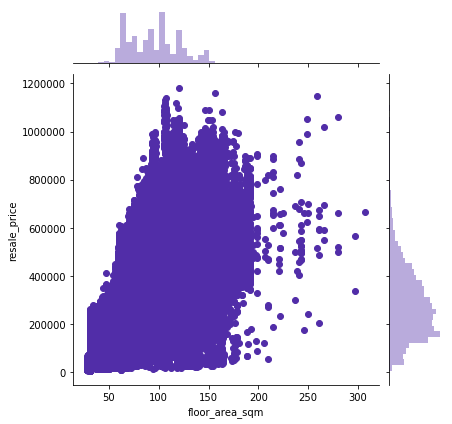

<Figure size 720x432 with 0 Axes>

In [12]:
## extract year from yyyy-mm 
year=pd.DatetimeIndex(resale['month']).year

#plotting jointplot
sns.jointplot(x="floor_area_sqm",y="resale_price",data=resale,color='#512DA8')

#resize the plot
plt.figure(figsize=(10,6))


Text(0.5, 1.0, 'Resale Price for Different Type of HDB Flats')

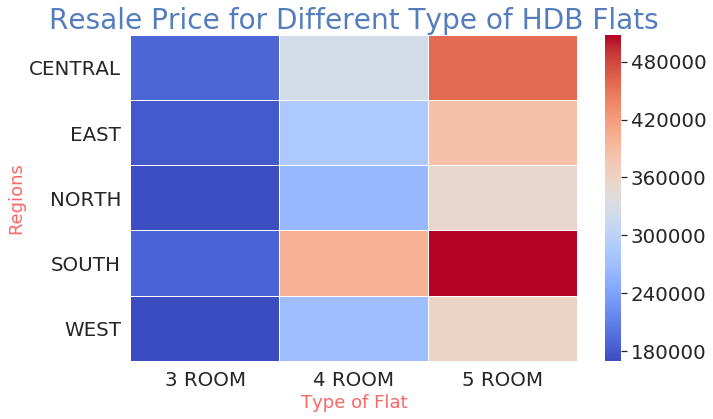

In [32]:
#replace the town to their respective regions
resale["town"].replace(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST','LIM CHU KANG'], 'WEST',inplace=True)
resale['town'].replace(['WOODLANDS','YISHUN','SENGKANG','SEMBAWANG'],'NORTH',inplace=True)
resale['town'].replace(['HOUGANG','PUNGGOL','SERANGOON','BEDOK','PASIR RIS','TAMPINES','GEYLANG'],'EAST',inplace=True)
resale['town'].replace(['ANG MO KIO','BISHAN','CENTRAL AREA','KALLANG/WHAMPOA','MARINE PARADE','TOA PAYOH'],'CENTRAL',inplace=True)
resale['town'].replace(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'],'SOUTH',inplace=True)

## extract year from yyyy-mm 
year=pd.DatetimeIndex(resale['month']).year

#convert the price to numbers 
pd.to_numeric(resale['resale_price'])

#extract columns 
by_type=resale[['town','flat_type','resale_price']]

#extract rows containing rooms that i want 
resale2=by_type[resale['flat_type'].isin(["3 ROOM", "4 ROOM", "5 ROOM"])]

#resize the graph
plt.figure(figsize=(10,6))

#spread rows into columns 
BY_TYPE=pd.pivot_table(resale2,values='resale_price',index=['town'],columns='flat_type')

#generate heatmap
sns.heatmap(BY_TYPE,linewidths=.1,cmap='coolwarm')

#put lables 
plt.xlabel("Type of Flat",size=18,color="#FF6666")
plt.ylabel("Regions",size=18,color="#FF6666")
plt.title("Resale Price for Different Type of HDB Flats",size=28,alpha=0.7,color="#0D47A1")